In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Load the historical stock prices
df = pd.read_csv('/content/drive/MyDrive/The Spark Foundation_Internship/S&P BSE SENSEX Data.csv')

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-02-2024,"71,998.78","73,089.40","70,809.84","72,708.16","72,708.16",160500
1,01-01-2024,"72,332.85","73,427.59","70,001.60","71,752.11","71,752.11",277000
2,01-12-2023,"67,181.15","72,484.34","67,149.07","72,240.26","72,240.26",284100
3,01-11-2023,"63,829.87","67,069.89","63,550.46","66,988.44","66,988.44",170900
4,01-10-2023,"65,813.42","66,592.16","63,092.98","63,874.93","63,874.93",192000


In [36]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
55,01-07-2019,39543.73,40032.41,37128.26,37481.12,37481.12,445000
56,01-06-2019,39806.86,40312.07,38870.96,39394.64,39394.64,311500
57,01-05-2019,39036.51,40124.96,36956.1,39714.2,39714.2,396100
58,01-04-2019,38858.88,39487.45,38460.25,39031.55,39031.55,312900
59,01-03-2019,36018.49,38748.54,35926.94,38672.91,38672.91,318000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       60 non-null     object
 1   Open       60 non-null     object
 2   High       60 non-null     object
 3   Low        60 non-null     object
 4   Close      60 non-null     object
 5   Adj Close  60 non-null     object
 6   Volume     60 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.4+ KB


In [38]:
df.describe()

,Volume
count,60.000000
mean,305738.333333
std,157654.067870
min,117300.000000
25%,189275.000000
50%,263750.000000
75%,384025.000000
max,859000.000000


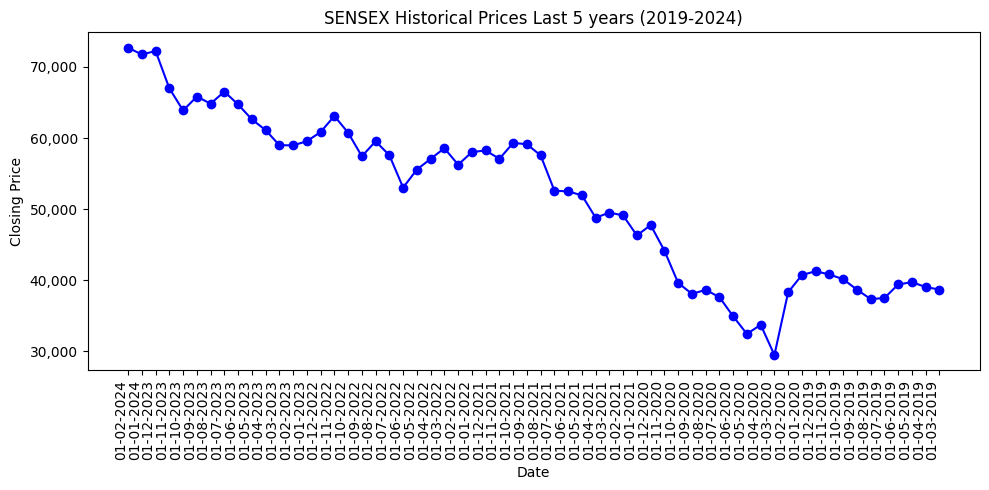

In [39]:
# Convert 'Close' column to numeric
#df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce')

# Plot the historical prices
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the closing prices over time
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b')

# Adjust x-axis ticks for better readability
plt.xticks(rotation=90, ha='right')  # Rotate x-axis ticks and align them to the right

# Reverse the order of x-axis ticks for chronological order
#plt.gca().invert_xaxis()

# Set y-axis ticker formatter to format labels as integers and provide more space
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

# Set title and labels
plt.title('SENSEX Historical Prices Last 5 years (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

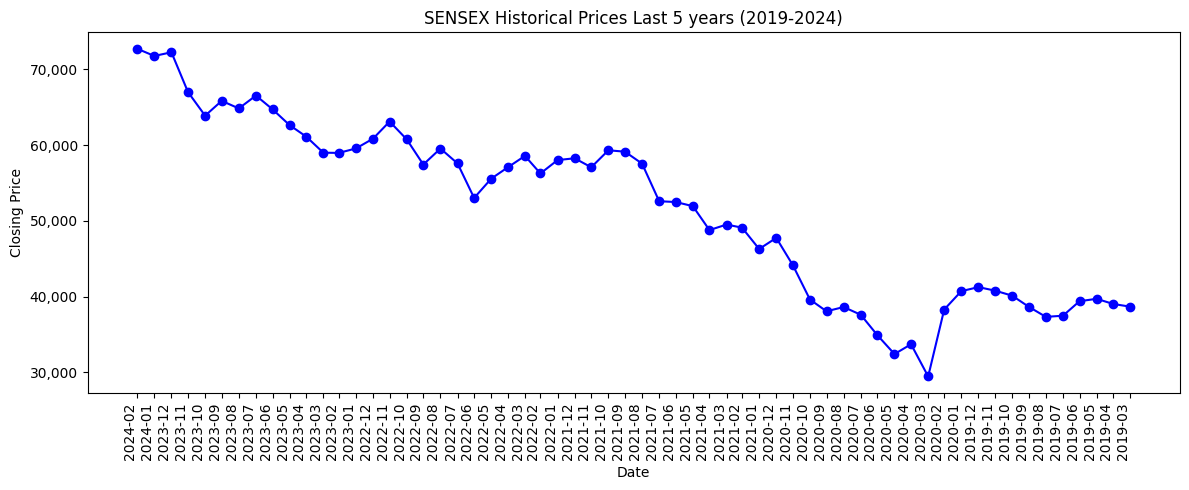

In [40]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plot the historical prices
plt.figure(figsize=(12, 5))  # Set the figure size

# Plot the closing prices over time
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b')

# Set x-axis ticks to show every month
plt.xticks(df['Date'], df['Date'].dt.strftime('%Y-%m'), rotation=90, ha='right')

# Reverse the order of x-axis ticks for chronological order
plt.gca().invert_xaxis()

# Set y-axis ticker formatter to format labels as integers and provide more space
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

# Set title and labels
plt.title('SENSEX Historical Prices Last 5 years (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
import plotly.express as px

fig = px.line(df, x='Date', y='Close', title='SENSEX Historical Prices Last 5 years (2019-2024)')
fig.update_xaxes(title_text='Date', tickformat='%Y-%m')
fig.update_yaxes(title_text='Closing Price')
fig.show()

In [42]:
# Remove commas and convert to numeric
df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''), errors='coerce')
df['High'] = pd.to_numeric(df['High'].str.replace(',', ''), errors='coerce')
df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''), errors='coerce')
df['Adj Close'] = pd.to_numeric(df['Adj Close'].str.replace(',', ''), errors='coerce')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already loaded your data into the 'df' DataFrame

# Drop 'Date' column and use the remaining columns as features (X)
X = df.drop(['Date', 'Close'], axis=1)

# Target variable (y) is 'Close'
y = df['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=10)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print(X)

print(f'RF Model MAE: {mae}')
print(f'RF Model MSE: {mse}')

RF Model MAE: 623.0553916666637
RF Model MSE: 962209.9468146184


In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

# Convert R2 score to percentage
r2_percentage = r2 * 100

print(f'R2 Score: {r2_percentage:.2f}%')

R2 Score: 99.09%


In [45]:
columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a DataFrame for the new data
new_data_df = pd.DataFrame([[71998.78, 73089.40, 70809.84, 72708.16, 160500]], columns=columns)

# Make predictions
predicted_price = rf.predict(new_data_df)
print("Predicted Stock Price:", predicted_price[0])


Predicted Stock Price: 71786.9960000001


In [46]:
# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print(X)

print(f'LR Model MAE: {mae}')
print(f'LR Model MSE: {mse}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

# Convert R2 score to percentage
r2_percentage = r2 * 100

print(f'R2 Score: {r2_percentage:.2f}%')

LR Model MAE: 623.0553916666637
LR Model MSE: 962209.9468146184
R2 Score: 99.09%


In [47]:
columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a DataFrame for the new data
new_data_df = pd.DataFrame([[71998.78, 73089.40, 70809.84, 72708.16, 160500]], columns=columns)

# Make predictions
predicted_price = lr_model.predict(new_data_df)
print("Predicted Stock Price:", predicted_price[0])

Predicted Stock Price: 72708.15999999999


In [48]:
# Get user inputs for features
open_price = float(input("Enter the Open price: "))
high_price = float(input("Enter the High price: "))
low_price = float(input("Enter the Low price: "))
adj_close_price = float(input("Enter the Adj Close price: "))
volume = int(input("Enter the Volume: "))

# Create a DataFrame for the user input
user_input_df = pd.DataFrame([[open_price, high_price, low_price, adj_close_price, volume]], columns=columns)

# Make predictions
predicted_price = lr_model.predict(user_input_df)
print("Predicted Stock Price:", predicted_price[0])

Enter the Open price: 71998.78
Enter the High price: 73089.40
Enter the Low price: 70809.84
Enter the Adj Close price: 72708.16
Enter the Volume: 160500
Predicted Stock Price: 72708.15999999999


In [49]:
# Textual analysis

# Load news headlines dataset
text_df = pd.read_csv('/content/drive/MyDrive/The Spark Foundation_Internship/india-news-headlines.csv')

In [50]:
text_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [51]:
text_df.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [52]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [53]:
text_df.describe()

,publish_date
count,3.650970e+06
mean,2.013193e+07
std,5.252282e+04
min,2.001010e+07
25%,2.010042e+07
50%,2.014023e+07
75%,2.017093e+07
max,2.022033e+07


In [54]:
# Sentiment analysis
text_df['Polarity'] = text_df['headline_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_df['Subjectivity'] = text_df['headline_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

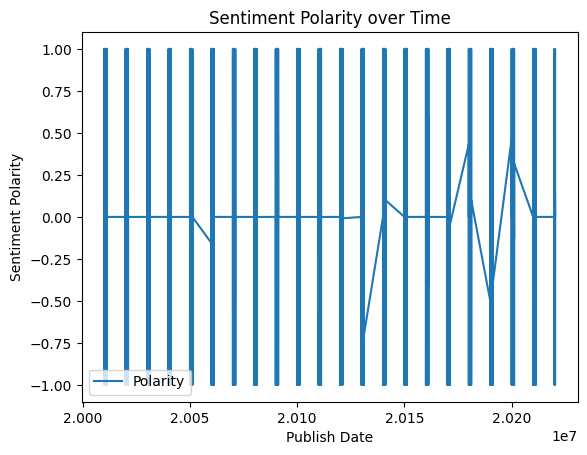

In [60]:
# Line plot
text_df.plot(x='publish_date', y='Polarity', kind='line')
plt.title('Sentiment Polarity over Time')
plt.xlabel('Publish Date')
plt.ylabel('Sentiment Polarity')
plt.show()


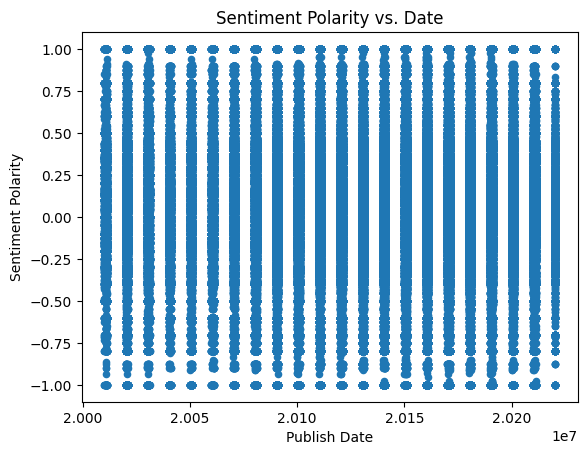

In [57]:
# Scatter plot
text_df.plot(x='publish_date', y='Polarity', kind='scatter')
plt.title('Sentiment Polarity vs. Date')
plt.xlabel('Publish Date')
plt.ylabel('Sentiment Polarity')
plt.show()

In [61]:
# Create hybrid model
# Extract textual features
text_features = text_df[['publish_date', 'Polarity', 'Subjectivity']]

In [62]:
print("Columns in df:", df.columns)
print("Columns in text_features:", text_features.columns)

Columns in df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Columns in text_features: Index(['publish_date', 'Polarity', 'Subjectivity'], dtype='object')


In [63]:
# Check data types
print(df['Date'].dtype)
print(text_features['publish_date'].dtype)

datetime64[ns]
int64


In [64]:
text_features = text_df[['publish_date', 'Polarity', 'Subjectivity']].copy()
text_features['publish_date'] = pd.to_datetime(text_features['publish_date'], format='%Y%m%d')

In [65]:
# Convert 'Date' column in df to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'publish_date' column in text_features to datetime type
text_features['publish_date'] = pd.to_datetime(text_features['publish_date'], format='%Y%m%d')

# Merge DataFrames on the datetime column
df_hybrid = pd.merge(df, text_features, left_on='Date', right_on='publish_date')

# Drop the redundant datetime column
df_hybrid = df_hybrid.drop(columns=['publish_date'])

In [66]:
# Train hybrid regression model
X = df_hybrid.drop(['Close'], axis=1)
y = df_hybrid['Close']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Polarity',
       'Subjectivity'],
      dtype='object')
Columns in X_test: Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Polarity',
       'Subjectivity'],
      dtype='object')


In [69]:
X_train['Date'] = X_train['Date'].astype(int)
X_test['Date'] = X_test['Date'].astype(int)

In [71]:
# Check the number of data points in df_hybrid
print("Number of data points after merge:", len(df_hybrid))

# Adjust the test size based on the number of data points
test_size = 0.2 if len(df_hybrid) > 0 else 0.0

# Train hybrid regression model

X_hybrid = df_hybrid.drop(['Close'], axis=1)
y_hybrid = df_hybrid['Close']

X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=0)

hybrid_model = LinearRegression()
hybrid_model.fit(X_train_hybrid, y_train_hybrid)

Number of data points after merge: 18450


LinearRegression()

MSE (Mean Squared Error): 1.7306142758285588e-22


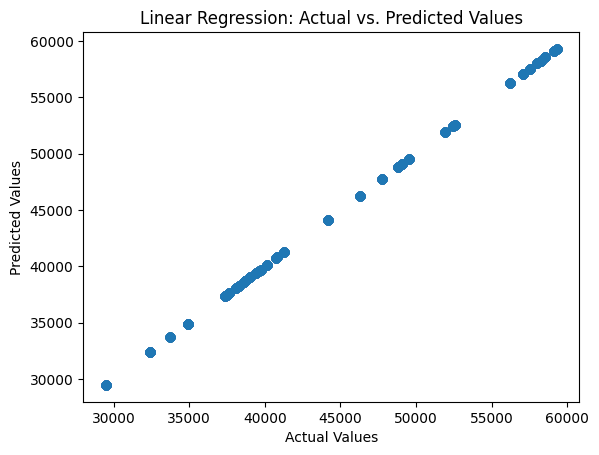

In [73]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_hybrid = hybrid_model.predict(X_test_hybrid)

# Evaluate the model
mse_hybrid = mean_squared_error(y_test_hybrid, y_pred_hybrid)

print(f'MSE (Mean Squared Error): {mse_hybrid}')

# Scatter plot of predicted vs. actual values
plt.scatter(y_test_hybrid, y_pred_hybrid)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

In [75]:
from sklearn.metrics import r2_score

r2_hybrid = r2_score(y_test_hybrid, y_pred_hybrid)

# Convert R2 score to percentage
r2_hybrid_percentage = r2_hybrid * 100

print(f'R2 Score of Hybrid Model: {r2_hybrid_percentage:.2f}%')

R2 Score of Hybrid Model: 100.00%
